In [1]:
pip install sklearn


  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1321 sha256=8f1658bd95e4a6461a8042a9373761e5623b65efa3438be7cdbc76dfd3127fca
  Stored in directory: C:\Users\12147\AppData\Local\pip\Cache\wheels\76\03\bb\589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install norm

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pickle

Note: you may need to restart the kernel to use updated packages.


  ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split 
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import pickle as pkl

In [2]:
#%% Import data and remove nulls

basicdata = pd.read_csv('Imputed_V2.csv')

#teradata used to have ? in place of nulls
basicdata.replace('?',np.nan, inplace=True)  
# drop nulls 
basicdata.dropna(inplace=True)

In [3]:
basicdata['CKD']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
5995    1.0
5996    0.0
5997    0.0
5998    0.0
5999    0.0
Name: CKD, Length: 6000, dtype: float64

In [4]:
#%% Explore numerical cols

numerical_cols = [ 'Age',
'Female',
'Educ',
'Unmarried',
'Income',
'Insured',
'Weight',
'Height',
'BMI',
'Obese',
'Waist',
'SBP',
'DBP',
'HDL',
'LDL',
'Total_Chol',
'Dyslipidemia',
'PVD',
'Activity',
'PoorVision',
'Smoker',
'Hypertension',
'Fam_Hypertension',
'Diabetes',
'Fam_Diabetes',
'Stroke',
'CVD',
'Fam_CVD',
'CHF',
'Anemia',
'CKD'                  
 ]


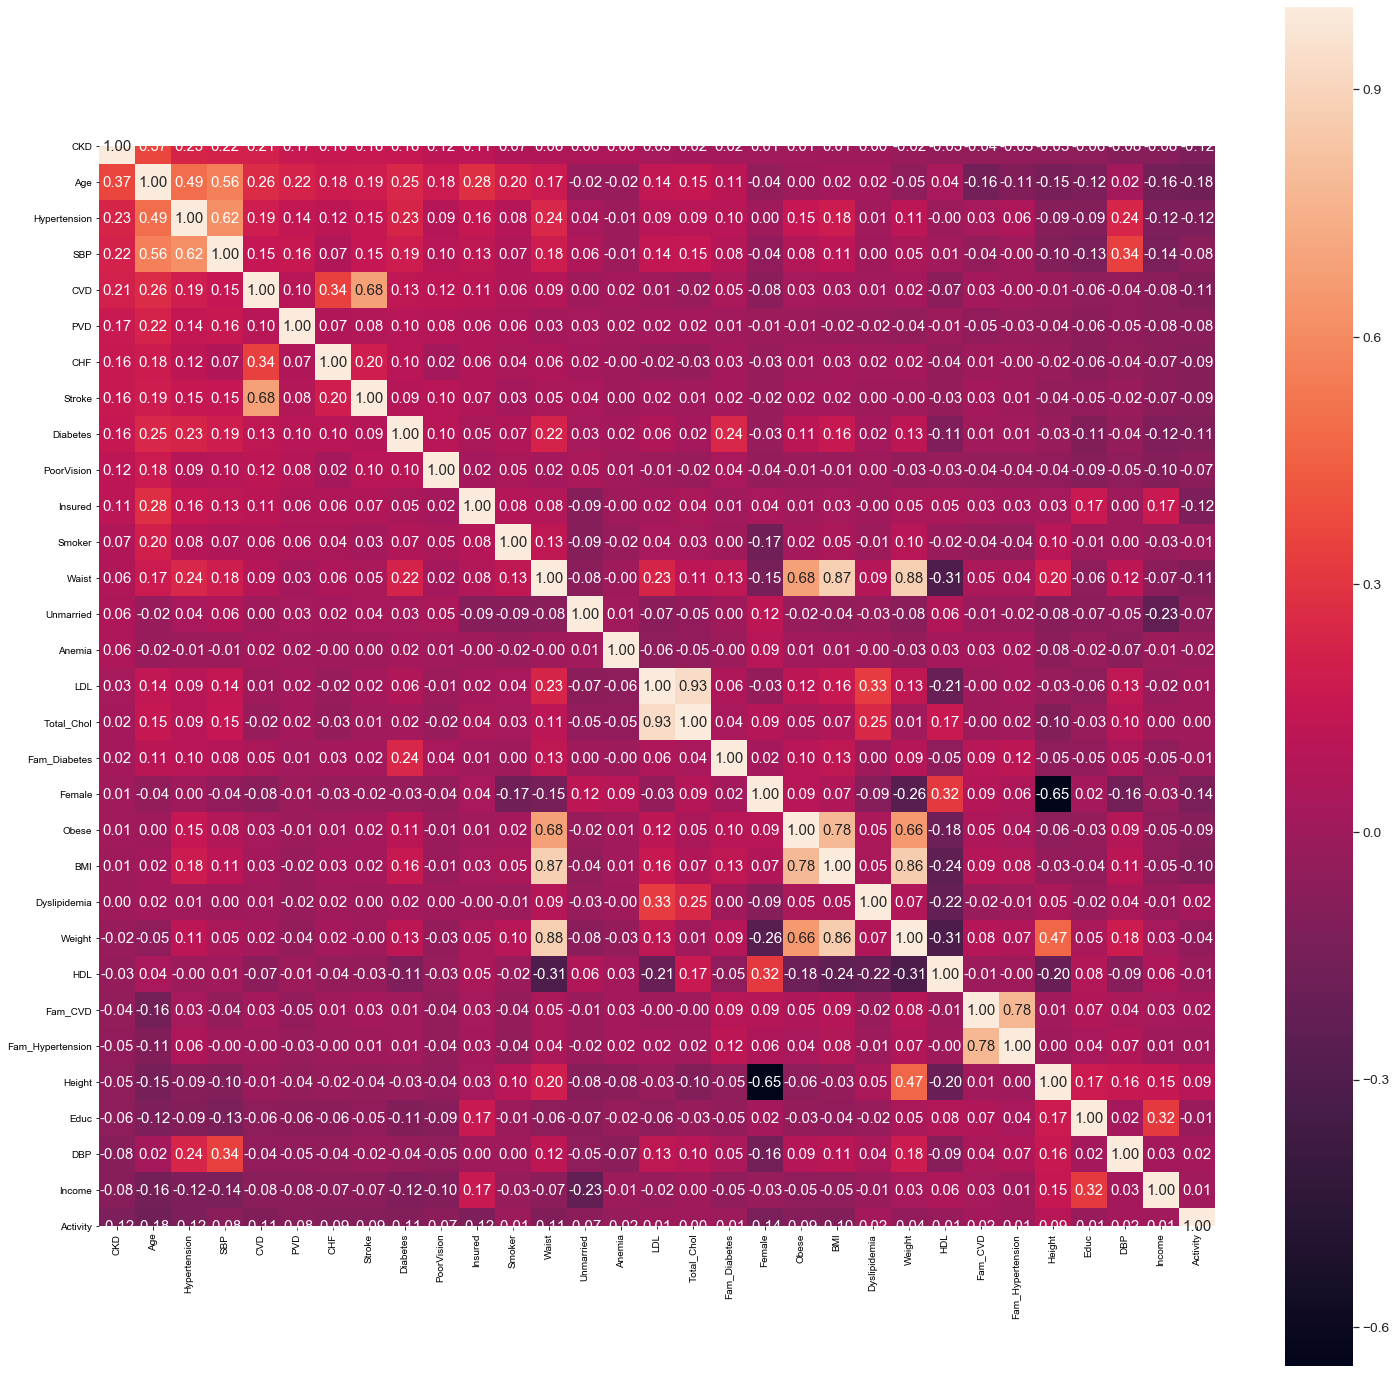

In [5]:
##explore correlation heatmap to check for multi collinearity
basicdata_numeric = basicdata[numerical_cols].copy()
corrmat = basicdata_numeric.corr()
f,ax = plt.subplots(figsize = (25,25))
k = 34 #number of variables for heatmap
cols = corrmat.nlargest(k, 'CKD')['CKD'].index
cm = np.corrcoef(basicdata_numeric[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [6]:
#%% Explore numerical cols

numerical_cols = [ 'Age',
'Female',
'Educ',
'Unmarried',
'Income',
'Insured',
'Weight',
'Height',
'BMI',
'Obese',
'Waist',
'SBP',
'DBP',
'HDL',
'LDL',
'Total_Chol',
'Dyslipidemia',
'PVD',
'Activity',
'PoorVision',
'Smoker',
'Hypertension',
'Fam_Hypertension',
'Diabetes',
'Fam_Diabetes',
'Stroke',
'CVD',
'Fam_CVD',
'CHF',
'Anemia'            
 ]


In [7]:
scaler = StandardScaler()
pca_full_data=pd.read_csv('Imputed_V2.csv')


In [8]:
pca_train = pca_full_data[numerical_cols]

In [69]:
pca_test = pca_test_temp[numerical_cols]

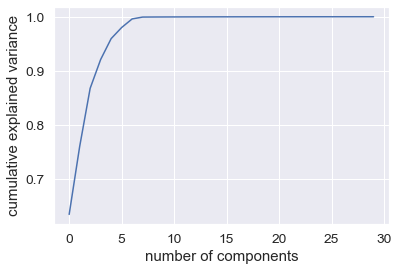

In [9]:
pca = PCA().fit(pca_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [10]:
#standardize the train set
scaled_numeric = scaler.fit_transform(pca_train)

#decided on 7 components based on explained ratio
pca = PCA(n_components=7) #7 variables explain almost all the variance from the above figure


pcs_train = pca.fit_transform(pca_train)
pca_colnames = ['pc'+str(i) for i in range(1,8)]

#pca transformed train set
pca_transformed_train = pd.DataFrame(data = pcs_train,columns = pca_colnames)

In [72]:
##use the same scale as the train and just transform the test set
scaled_numeric_test = scaler.transform(pca_test[numerical_cols])

##
pcs_test = pca.transform(pca_test)
pca_transformed_test = pd.DataFrame(data = pcs_test,columns = pca_colnames)

In [11]:
pca_transformed_train


,pc1,pc2,pc3,pc4,pc5,pc6,pc7
0,133.106601,-26.128190,14.109654,-19.790495,-2.355361,-2.505358,2.276415
1,-43.762436,-24.735740,-25.931108,-33.024402,-11.939262,5.579720,2.624722
2,77.656408,6.554126,-8.844780,-5.190479,-27.262224,3.463205,-2.977355
3,18.069794,-35.008344,0.444812,15.187057,-15.144985,-0.591718,2.884197
4,13.313831,-12.449813,19.175503,10.652670,-4.303516,-2.194665,-4.526287
...,...,...,...,...,...,...,...
8814,-60.637705,-1.308537,-13.095212,4.091705,7.584553,1.544460,-1.271607
8815,45.632298,-21.022940,47.273987,27.704473,-19.716332,17.832190,16.111866
8816,105.546319,-42.489401,11.621391,-8.888965,7.048568,-10.530395,-2.739408
8817,-48.921044,-17.165321,-14.815621,28.654956,9.800303,6.098630,-7.437103


In [74]:

pca_train=pca_train_temp.reset_index(drop = True).copy()
train_df = pd.concat([pca_transformed_train, pca_train[pca_train.columns.difference(numerical_cols)]], axis = 1)
train_df['train_test'] = 'train'


pca_test=pca_test_temp.reset_index(drop = True).copy()
test_df = pd.concat([pca_transformed_test, pca_test[pca_test.columns.difference(numerical_cols)]], axis = 1)
test_df['train_test']= 'test'

final_df = pd.concat([train_df, test_df], ignore_index = True)

In [75]:
final_df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,CKD,CareSource,ID,Racegrp,Unnamed: 0,train_test
0,35.039926,12.747207,28.986683,15.136845,-12.107480,8.032409,3.820059,1,DrHMO,2994,white,2994,train
1,59.175847,-17.476312,8.337279,46.725135,-11.552376,-2.933617,4.061685,1,DrHMO,4772,white,4772,train
2,-0.360548,-15.358738,27.771627,-24.775879,-18.132072,7.828269,-0.526979,1,DrHMO,1645,white,1645,train
3,-13.280313,49.104561,-11.538651,14.791379,-40.282041,-12.791027,2.296001,1,DrHMO,3028,white,3028,train
4,-64.752158,-25.594117,-27.566770,-20.101949,-4.908195,25.544211,-13.036738,1,DrHMO,5297,white,5297,train


In [76]:
final_df.drop(columns=['Unnamed: 0'])

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,CKD,CareSource,ID,Racegrp,train_test
0,35.039926,12.747207,28.986683,15.136845,-12.107480,8.032409,3.820059,1,DrHMO,2994,white,train
1,59.175847,-17.476312,8.337279,46.725135,-11.552376,-2.933617,4.061685,1,DrHMO,4772,white,train
2,-0.360548,-15.358738,27.771627,-24.775879,-18.132072,7.828269,-0.526979,1,DrHMO,1645,white,train
3,-13.280313,49.104561,-11.538651,14.791379,-40.282041,-12.791027,2.296001,1,DrHMO,3028,white,train
4,-64.752158,-25.594117,-27.566770,-20.101949,-4.908195,25.544211,-13.036738,1,DrHMO,5297,white,train
...,...,...,...,...,...,...,...,...,...,...,...,...
5995,72.858566,43.717051,-10.962531,15.966626,19.832110,-16.788931,-7.384282,0,clinic,5984,black,test
5996,35.496571,18.259794,2.581348,22.062975,-3.069330,-12.394600,5.565437,0,DrHMO,5988,white,test
5997,55.474076,-5.475157,-11.354635,-25.646481,-8.662501,-11.991982,-3.705922,0,DrHMO,5990,white,test
5998,49.620797,-4.203492,9.537971,-27.166584,-8.837339,-12.005027,4.156968,0,DrHMO,5995,hispa,test


In [77]:
df_cols = [ 'CKD', 'CareSource','ID', 'Racegrp', 'train_test' ]

cat_cols =['CareSource','Racegrp']

final_df[cat_cols] = final_df[cat_cols].apply(lambda x: x.astype('category'))
final_df[cat_cols]
final_df = pd.get_dummies(final_df, drop_first = True)

In [78]:
final_df.drop(columns=['Unnamed: 0'])

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,CKD,ID,CareSource_clinic,CareSource_noplace,CareSource_other,Racegrp_hispa,Racegrp_other,Racegrp_white,train_test_train
0,35.039926,12.747207,28.986683,15.136845,-12.107480,8.032409,3.820059,1,2994,0,0,0,0,0,1,1
1,59.175847,-17.476312,8.337279,46.725135,-11.552376,-2.933617,4.061685,1,4772,0,0,0,0,0,1,1
2,-0.360548,-15.358738,27.771627,-24.775879,-18.132072,7.828269,-0.526979,1,1645,0,0,0,0,0,1,1
3,-13.280313,49.104561,-11.538651,14.791379,-40.282041,-12.791027,2.296001,1,3028,0,0,0,0,0,1,1
4,-64.752158,-25.594117,-27.566770,-20.101949,-4.908195,25.544211,-13.036738,1,5297,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,72.858566,43.717051,-10.962531,15.966626,19.832110,-16.788931,-7.384282,0,5984,1,0,0,0,0,0,0
5996,35.496571,18.259794,2.581348,22.062975,-3.069330,-12.394600,5.565437,0,5988,0,0,0,0,0,1,0
5997,55.474076,-5.475157,-11.354635,-25.646481,-8.662501,-11.991982,-3.705922,0,5990,0,0,0,0,0,1,0
5998,49.620797,-4.203492,9.537971,-27.166584,-8.837339,-12.005027,4.156968,0,5995,0,0,0,1,0,0,0


In [79]:
##TEST AND TRAIN SET TO BE USED FOR PREDICTION MODEL 

total_df= final_df[['ID','pc1','pc2','pc3','pc4','pc5','pc6','pc7','CKD','CareSource_clinic','CareSource_noplace','CareSource_other','Racegrp_hispa','Racegrp_other','Racegrp_white','train_test_train']]
train_set=total_df.loc[total_df['train_test_train'] ==1]
test_set= total_df.loc[total_df['train_test_train'] ==0]
train_set[['ID','pc1','pc2','pc3','pc4','pc5','pc6','pc7','CKD','CareSource_clinic','CareSource_noplace','CareSource_other','Racegrp_hispa','Racegrp_other','Racegrp_white']].to_csv('train.csv')
test_set[['ID','pc1','pc2','pc3','pc4','pc5','pc6','pc7','CKD','CareSource_clinic','CareSource_noplace','CareSource_other','Racegrp_hispa','Racegrp_other','Racegrp_white']].to_csv('test.csv')
### pca ends here